In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

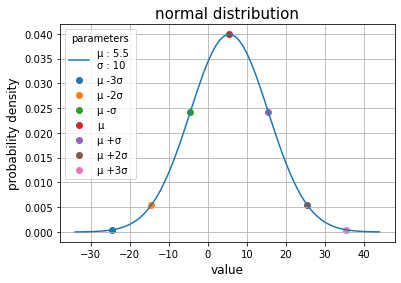

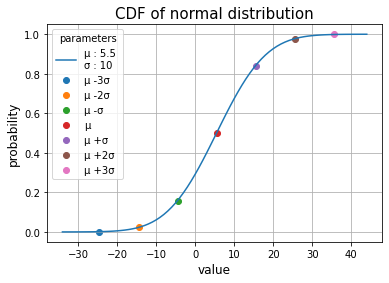

In [2]:
# pdf and cdf for a normal distribution
# define distribution parameters
mu = 5.5
sigma = 10

# create distribution
dist = norm(mu, sigma)

# mean minus and plus std devs
point_m3 = mu - 3 * sigma
point_m2 = mu - 2 * sigma
point_m1 = mu - sigma
point_m = mu
point_p1 = mu + sigma
point_p2 = mu + 2 * sigma
point_p3 = mu + 3 * sigma

# plot pdf
# calculate range for plot to show tails
values = [value for value in range(int(mu - math.floor(4.*sigma)), int(mu + math.floor(4*sigma)))]
probabilities = [dist.pdf(value) for value in values]
plt.plot(values, probabilities, label=chr(956)+' : '+str(mu)+' \n'+chr(963) +' : '+str(sigma))
plt.scatter(point_m3, dist.pdf(point_m3), label=chr(956)+' -3'+chr(963))
plt.scatter(point_m2, dist.pdf(point_m2), label=chr(956)+' -2'+chr(963))
plt.scatter(point_m1, dist.pdf(point_m1), label=chr(956)+' -'+chr(963))
plt.scatter(point_m, dist.pdf(point_m), label=chr(956))
plt.scatter(point_p1, dist.pdf(point_p1), label=chr(956)+' +'+chr(963))
plt.scatter(point_p2, dist.pdf(point_p2), label=chr(956)+' +2'+chr(963))
plt.scatter(point_p3, dist.pdf(point_p3), label=chr(956)+' +3'+chr(963))
plt.xlabel('value', fontsize=12)
plt.ylabel('probability density', fontsize=12)
plt.title('normal distribution', fontsize=15)
plt.legend(title = 'parameters', loc = 'upper left')
plt.grid()
plt.savefig('normal_pdf.svg')
plt.show();

# plot cdf
cum_probs = [dist.cdf(value) for value in values]
plt.plot(values, cum_probs, label=chr(956)+' : '+str(mu)+' \n'+chr(963) +' : '+str(sigma))
plt.scatter(point_m3, dist.cdf(point_m3), label=chr(956)+' -3'+chr(963))
plt.scatter(point_m2, dist.cdf(point_m2), label=chr(956)+' -2'+chr(963))
plt.scatter(point_m1, dist.cdf(point_m1), label=chr(956)+' -'+chr(963))
plt.scatter(point_m, dist.cdf(point_m), label=chr(956))
plt.scatter(point_p1, dist.cdf(point_p1), label=chr(956)+' +'+chr(963))
plt.scatter(point_p2, dist.cdf(point_p2), label=chr(956)+' +2'+chr(963))
plt.scatter(point_p3, dist.cdf(point_p3), label=chr(956)+' +3'+chr(963))
plt.xlabel('value', fontsize=12)
plt.ylabel('probability', fontsize=12)
plt.title("CDF of normal distribution", fontsize=15)
plt.legend(title = 'parameters', loc = 'upper left')
plt.grid()
plt.savefig('normal_cdf.svg')
plt.show();


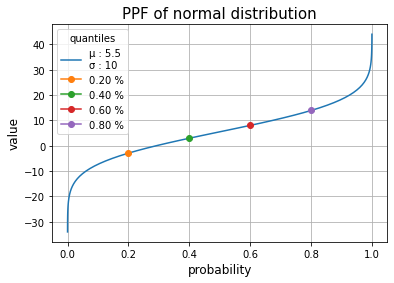

In [3]:
# calculate quantile points
number_quantiles = 5
interval = 1 / number_quantiles
interval
quantile = []
quantile_val = []
for n in range(1, number_quantiles):
    quantile.append(interval * n)
    quantile_val.append(dist.ppf(interval * n))

# plot ppf
cum_probs = [dist.cdf(value) for value in values]
plt.plot(cum_probs, values, label=chr(956)+' : '+str(mu)+' \n'+chr(963) +' : '+str(sigma) )
for n, value in enumerate(quantile):
    plt.plot(value, quantile_val[n], marker ='o', label ='{:.2f} %'.format(value))
plt.ylabel('value', fontsize=12)
plt.xlabel('probability', fontsize=12)
plt.title("PPF of normal distribution", fontsize=15)
plt.legend(title = 'quantiles', loc = 'upper left')
plt.grid()
plt.savefig('normal_ppf.svg')
plt.show();

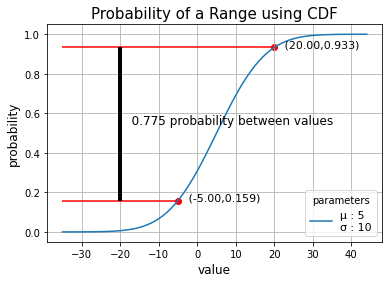

In [4]:
# calculate probabilities from cdf (z-value method)
mu = 5
sigma = 10
# create distribution
dist = norm(mu, sigma)

# calculate probabilities of interval between value_1 and value_2
value_1 = -5
value_2 = 20
prob1 = dist.cdf(value_1)
prob2 = dist.cdf(value_2)
interval_prob = prob2 - prob1

# calculate range for plot to show tails
values = [value for value in range(int(mu - math.floor(4.*sigma)), int(mu + math.floor(4*sigma)))]
cum_probs = [dist.cdf(value) for value in values]

plt.plot(values, cum_probs, label=chr(956)+' : '+str(mu)+' \n'+chr(963) +' : '+str(sigma))
plt.scatter(value_1, dist.cdf(value_1), color='r')
plt.scatter(value_2, dist.cdf(value_2), color='r')
plt.hlines(y=prob1, xmin=values[0], xmax=value_1, color='r') 
plt.hlines(y=prob2, xmin=values[0], xmax=value_2, color='r')
# plot probability line on center of lower value line
x_centerlower = (values[0] + value_1) / 2
plt.vlines(x=x_centerlower, ymin=prob1, ymax=prob2, color='black', linewidth=4)
# plot text on center of probability line
plt.text(x_centerlower, ((interval_prob /2) + prob1), '   {:.3f} probability between values'.format(interval_prob), fontsize=12)
plt.xlabel('value', fontsize=12)
plt.ylabel('probability', fontsize=12)
plt.title("Probability of a Range using CDF", fontsize=15)
plt.legend(title = 'parameters', loc = 'lower right', fontsize=11)
plt.annotate('   ({:.2f},{:.3f})'.format(value_1, prob1), (value_1, prob1), fontsize=11)
plt.annotate('   ({:.2f},{:.3f})'.format(value_2, prob2), (value_2, prob2), fontsize=11)
plt.grid()
plt.savefig('normal_probrange.svg')
plt.show();

159


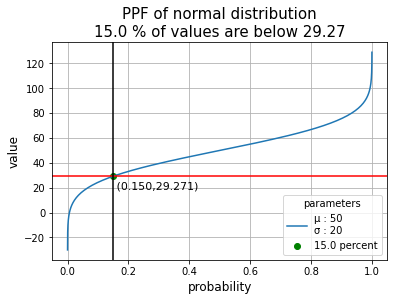

In [5]:
# PPF - lookup value for percentage less than
mu = 50
sigma = 20
# create distribution
dist = norm(mu, sigma)

# calculate value that corresponds to percentile
percentile = 0.15
percentile_value = dist.ppf(percentile)

# plot ppf
values = [value for value in range(int(mu - math.floor(4.*sigma)), int(mu + math.floor(4*sigma)))]
cum_probs = [dist.cdf(value) for value in values]
plt.plot(cum_probs, values, label=chr(956)+' : '+str(mu)+' \n'+chr(963) +' : '+str(sigma))
plt.scatter(percentile, percentile_value, marker ='o', color='green', label='{:.1f} percent'.format(percentile * 100))
plt.axhline(y=percentile_value, color='r')
plt.axvline(x=percentile, color='black')
plt.ylabel('value', fontsize=12)
plt.xlabel('probability', fontsize=12)
plt.title('PPF of normal distribution\n{:.1f} % of values are below {:.2f}'\
          .format(percentile * 100, percentile_value), fontsize=15)
# move the text down a bit
down_abit = percentile_value - (max(values) - min(values))/15
print(max(values) - min(values))
plt.annotate(' ({:.3f},{:.3f})'.format(percentile, percentile_value), (percentile, down_abit), fontsize=11)
plt.legend(title = 'parameters', loc = 'lower right')
plt.grid()
plt.savefig('normal_ppfvalue.svg')
plt.show();